**PROJECT STRUCTURE**
we aim to do text classification using three methods.
1. SVM
2. Logistic Regression
3. Random Forest
4. Neural Networks

The project has been divided into three parts
1. **Simple Classification using Sklearn libraries**
    In this, we aim to classify using **SVM**,**Logistic Regression** and **Random Forest** and simply use **CountVectorizer** to convert the words into vectors, we will test out different parameters for the classifiers

2. **Simple Classification using Sklearn libraries but change the pre-processing**
    In this, we aim to classify using the best method obtained from the first part and use a **TF-IDF** vectorizer along with **removing stopwords** to convert the words into vectors, we will test out different parameters for the classifier
3. **Classification using a Neural Network** 

1.**CountVectorizer along with SVM and Logistic Regression**

In [5]:
import pandas as pd
import numpy as np

In [61]:
file_path ={'amazon': 'sentiment labelled sentences/amazon_cells_labelled.txt',
            'imdb': 'sentiment labelled sentences/imdb_labelled.txt',
            'yelp': 'sentiment labelled sentences/yelp_labelled.txt'}

In [62]:
df_list = []
for source, filepath in file_path.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object


In [ ]:
df.to_excel('sentiment_data.xlsx')

In [63]:
df.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [64]:
df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [65]:
df['sentence'].values

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.', ...,
       'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",
       "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype=object)

In [66]:
df['label'].value_counts()

1    1386
0    1362
Name: label, dtype: int64

**TEXT VECTORIZATION**

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False)

In [87]:
vectorizer.fit(df['sentence'])

CountVectorizer(lowercase=False, min_df=5)

In [69]:
processed_features = vectorizer.transform(df['sentence']).toarray()

In [82]:
processed_features.shape

(2748, 5888)

**RANDOMFOREST CLASSIFIER**

In [70]:
from sklearn.model_selection import train_test_split
import pickle
labels = df['label']
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0, stratify=labels)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1923, 5888)
(825, 5888)
(1923,)
(825,)


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
params_grid=[{ 'n_estimators':[100,150,200],
    'max_depth':[None,5,10,20],
              'criterion':['gini', 'entropy', 'log_loss']}]
rf = RandomForestClassifier(n_estimators=100,random_state=42,verbose = 1)
grid_searchRF = GridSearchCV(rf, params_grid, cv=5, scoring='accuracy',verbose=3)

In [18]:
#RAN ON GOOGLE COLAB
grid_searchRF.fit(X_train, y_train)

filename = 'grid_searchRF.sav'
pickle.dump(grid_searchRF, open(filename, 'wb'))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.756 total time=   4.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.790 total time=   3.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.764 total time=   3.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.760 total time=   3.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.750 total time=   3.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=None, n_estimators=150;, score=0.753 total time=   5.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=None, n_estimators=150;, score=0.808 total time=   4.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=None, n_estimators=150;, score=0.756 total time=   4.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=None, n_estimators=150;, score=0.766 total time=   5.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=None, n_estimators=150;, score=0.740 total time=   4.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 1/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.753 total time=   6.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.808 total time=   6.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 3/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.761 total time=   6.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.773 total time=   7.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.745 total time=   5.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.709 total time=   0.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.740 total time=   0.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.730 total time=   0.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.711 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=5, n_estimators=100;, score=0.698 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=5, n_estimators=150;, score=0.719 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=5, n_estimators=150;, score=0.745 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=5, n_estimators=150;, score=0.740 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=5, n_estimators=150;, score=0.716 total time=   0.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=5, n_estimators=150;, score=0.698 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.732 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.740 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.743 total time=   0.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.737 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.706 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.753 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.774 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.753 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.721 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=10, n_estimators=100;, score=0.729 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=10, n_estimators=150;, score=0.764 total time=   2.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=10, n_estimators=150;, score=0.769 total time=   2.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=10, n_estimators=150;, score=0.764 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=10, n_estimators=150;, score=0.742 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=10, n_estimators=150;, score=0.734 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.756 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.787 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.779 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.745 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.742 total time=   1.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=20, n_estimators=100;, score=0.758 total time=   1.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=20, n_estimators=100;, score=0.782 total time=   1.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=20, n_estimators=100;, score=0.761 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=20, n_estimators=100;, score=0.737 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=20, n_estimators=100;, score=0.750 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=20, n_estimators=150;, score=0.779 total time=   1.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=20, n_estimators=150;, score=0.779 total time=   1.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=20, n_estimators=150;, score=0.753 total time=   1.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=20, n_estimators=150;, score=0.742 total time=   1.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=20, n_estimators=150;, score=0.760 total time=   2.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=gini, max_depth=20, n_estimators=200;, score=0.779 total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=gini, max_depth=20, n_estimators=200;, score=0.784 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=gini, max_depth=20, n_estimators=200;, score=0.764 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=gini, max_depth=20, n_estimators=200;, score=0.763 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=gini, max_depth=20, n_estimators=200;, score=0.758 total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=100;, score=0.766 total time=   4.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=100;, score=0.800 total time=   3.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=100;, score=0.777 total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=100;, score=0.760 total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=100;, score=0.753 total time=   3.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=150;, score=0.756 total time=   5.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=150;, score=0.808 total time=   4.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=150;, score=0.777 total time=   5.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=150;, score=0.771 total time=   5.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=150;, score=0.745 total time=   4.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.766 total time=   7.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.821 total time=   6.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.777 total time=   6.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.776 total time=   6.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=200;, score=0.758 total time=   6.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.712 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.761 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.722 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.719 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.682 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=150;, score=0.758 total time=   0.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=150;, score=0.753 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=150;, score=0.727 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=150;, score=0.742 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=150;, score=0.703 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.745 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.745 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.740 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.753 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.716 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.748 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.774 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.753 total time=   0.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.755 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.724 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.774 total time=   1.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.779 total time=   1.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.764 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.750 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.734 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.771 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.782 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.774 total time=   1.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.753 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.745 total time=   2.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.761 total time=   1.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.790 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.777 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.773 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.755 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=150;, score=0.779 total time=   1.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=150;, score=0.790 total time=   1.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=150;, score=0.771 total time=   1.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=150;, score=0.758 total time=   2.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=150;, score=0.771 total time=   2.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.779 total time=   2.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.782 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.764 total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.771 total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.776 total time=   2.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=None, n_estimators=100;, score=0.766 total time=   4.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=None, n_estimators=100;, score=0.800 total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=None, n_estimators=100;, score=0.777 total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=None, n_estimators=100;, score=0.760 total time=   3.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=None, n_estimators=100;, score=0.753 total time=   4.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=None, n_estimators=150;, score=0.756 total time=   5.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=None, n_estimators=150;, score=0.808 total time=   4.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=None, n_estimators=150;, score=0.777 total time=   5.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=None, n_estimators=150;, score=0.771 total time=   4.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=None, n_estimators=150;, score=0.745 total time=   4.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 1/5] END criterion=log_loss, max_depth=None, n_estimators=200;, score=0.766 total time=   7.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 2/5] END criterion=log_loss, max_depth=None, n_estimators=200;, score=0.821 total time=   6.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 3/5] END criterion=log_loss, max_depth=None, n_estimators=200;, score=0.777 total time=   7.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 4/5] END criterion=log_loss, max_depth=None, n_estimators=200;, score=0.776 total time=   6.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[CV 5/5] END criterion=log_loss, max_depth=None, n_estimators=200;, score=0.758 total time=   6.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=0.712 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=0.761 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=0.722 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=0.719 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=5, n_estimators=100;, score=0.682 total time=   0.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=5, n_estimators=150;, score=0.758 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=5, n_estimators=150;, score=0.753 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=5, n_estimators=150;, score=0.727 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=5, n_estimators=150;, score=0.742 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=5, n_estimators=150;, score=0.703 total time=   0.7s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=5, n_estimators=200;, score=0.745 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=5, n_estimators=200;, score=0.745 total time=   0.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=5, n_estimators=200;, score=0.740 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=5, n_estimators=200;, score=0.753 total time=   1.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=5, n_estimators=200;, score=0.716 total time=   0.9s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=0.748 total time=   0.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=0.774 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=0.753 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=0.755 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=10, n_estimators=100;, score=0.724 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=10, n_estimators=150;, score=0.774 total time=   1.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=10, n_estimators=150;, score=0.779 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=10, n_estimators=150;, score=0.764 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=10, n_estimators=150;, score=0.750 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=10, n_estimators=150;, score=0.734 total time=   1.1s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.771 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.782 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.774 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.753 total time=   2.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=10, n_estimators=200;, score=0.745 total time=   2.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=20, n_estimators=100;, score=0.761 total time=   1.5s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=20, n_estimators=100;, score=0.790 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=20, n_estimators=100;, score=0.777 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=20, n_estimators=100;, score=0.773 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=20, n_estimators=100;, score=0.755 total time=   1.2s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=20, n_estimators=150;, score=0.779 total time=   1.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=20, n_estimators=150;, score=0.790 total time=   1.8s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=20, n_estimators=150;, score=0.771 total time=   2.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=20, n_estimators=150;, score=0.758 total time=   2.6s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=20, n_estimators=150;, score=0.771 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 1/5] END criterion=log_loss, max_depth=20, n_estimators=200;, score=0.779 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 2/5] END criterion=log_loss, max_depth=20, n_estimators=200;, score=0.782 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 3/5] END criterion=log_loss, max_depth=20, n_estimators=200;, score=0.764 total time=   2.4s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 4/5] END criterion=log_loss, max_depth=20, n_estimators=200;, score=0.771 total time=   2.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


[CV 5/5] END criterion=log_loss, max_depth=20, n_estimators=200;, score=0.776 total time=   3.3s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.6s


In [74]:
grid_searchRF = pickle.load(open('grid_searchRF.sav', 'rb'))

In [75]:
print(grid_searchRF.best_params_)
rf = grid_searchRF.best_estimator_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score:  0.7624242424242424
Precision score:  0.7631578947368421
Recall score:  0.7668269230769231
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       409
           1       0.76      0.77      0.76       416

    accuracy                           0.76       825
   macro avg       0.76      0.76      0.76       825
weighted avg       0.76      0.76      0.76       825



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished


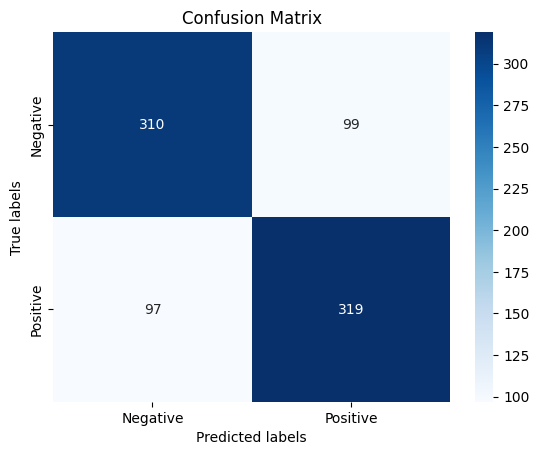

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

**SVM CLASSIFIER**

In [80]:
processed_features.shape

(2748, 5888)

In [84]:
labels = df['label']
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0, stratify=labels)

In [90]:
from sklearn.svm import SVC

In [91]:
params_grid=[{ 'C':[0.1,1,10,100],
    'kernel':['rbf', 'linear','poly']}]

svc = SVC(random_state=42,verbose = 1)
grid_searchSVC = GridSearchCV(svc, params_grid, cv=5, scoring='accuracy',verbose=3)

In [ ]:
#RAN ON GOOGLE COLAB and saved the model
grid_searchSVC.fit(X_train, y_train)
pickle.dump(grid_searchSVC, open('grid_searchSVC.sav', 'wb'))

In [97]:
svc = pickle.load(open('grid_searchSVC.sav', 'rb'))

In [98]:
print(svc.best_params_)
svc = svc.best_estimator_

{'C': 100, 'kernel': 'rbf'}


In [99]:
y_pred = svc.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score:  0.7733333333333333
Precision score:  0.7527593818984547
Recall score:  0.8197115384615384
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       409
           1       0.75      0.82      0.78       416

    accuracy                           0.77       825
   macro avg       0.78      0.77      0.77       825
weighted avg       0.78      0.77      0.77       825



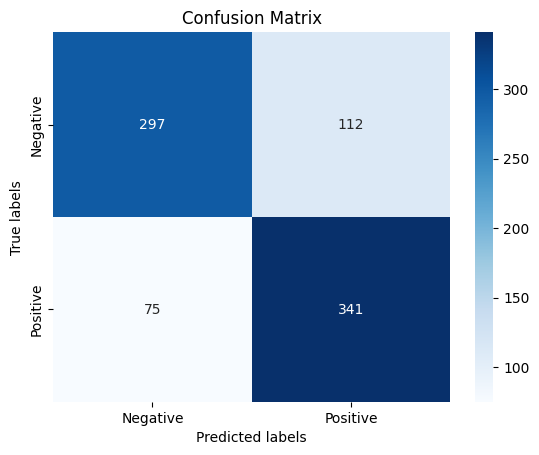

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

**LOGISTIC REGRESSION CLASSIFIER**

In [103]:
processed_features.shape

(2748, 5888)

In [104]:
labels = df['label']
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0, stratify=labels)

In [106]:
from sklearn.linear_model import LogisticRegression

params_grid=[{ 'C':[0.1,1,10,100],
    'penalty':['l1','l2'],
    'max_iter':[100,150,200,250,300]}]

lr = LogisticRegression(random_state=42,verbose = 1)
grid_searchLR = GridSearchCV(lr, params_grid, cv=5, scoring='accuracy',verbose=3)

In [ ]:
#RAN ON GOOGLE COLAB and saved the model
grid_searchLR.fit(X_train, y_train)
pickle.dump(grid_searchLR, open('grid_searchLR.sav', 'wb'))

In [107]:
gridsearchLR = pickle.load(open('grid_searchLR.sav', 'rb'))

In [109]:
print(gridsearchLR.best_params_)
lr = gridsearchLR.best_estimator_
y_pred = lr.predict(X_test)

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}


In [110]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score:  0.7842424242424243
Precision score:  0.759825327510917
Recall score:  0.8365384615384616
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       409
           1       0.76      0.84      0.80       416

    accuracy                           0.78       825
   macro avg       0.79      0.78      0.78       825
weighted avg       0.79      0.78      0.78       825



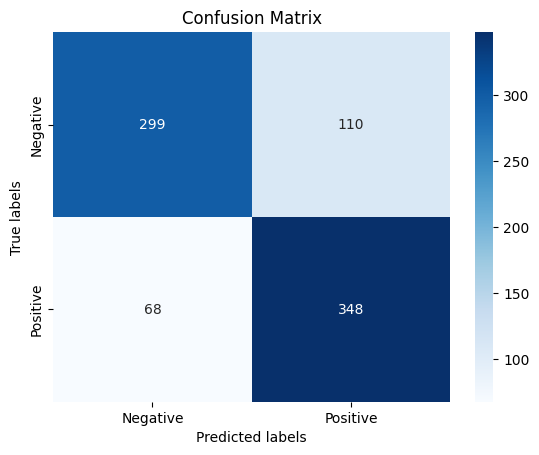

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()


**Comparing all three models**

In [114]:
gridsearchlr = pickle.load(open('grid_searchLR.sav', 'rb'))
gridsearchsvc = pickle.load(open('grid_searchRF.sav', 'rb'))
gridsearchrf = pickle.load(open('grid_searchSVC.sav', 'rb'))
lr = gridsearchlr.best_estimator_
svc = gridsearchsvc.best_estimator_
rf = gridsearchrf.best_estimator_

In [115]:
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)

print('Accuracy score for Logistic Regression: ', accuracy_score(y_test, y_pred_lr))
print('Accuracy score for Support Vector Classifier: ', accuracy_score(y_test, y_pred_svc))
print('Accuracy score for Random Forest Classifier: ', accuracy_score(y_test, y_pred_rf))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


Accuracy score for Logistic Regression:  0.7842424242424243
Accuracy score for Support Vector Classifier:  0.7624242424242424
Accuracy score for Random Forest Classifier:  0.7733333333333333


**As we can see from a simple first glance that logistic regression outperforms all the other classifiers albeit with a low margin, we will be using Logistic Regression for this next part**

**2. Using TF-IDF vectorization and better pre-processing to see if it affects the accuracy of the model**

In [166]:
df_list = []
for source, filepath in file_path.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object


In [168]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import nltk
from nltk.corpus import stopwords

In [169]:
custom_stopwords = stopwords.words('english')

In [176]:
tfidf = TfidfVectorizer()
processed_features = tfidf.fit_transform(df['sentence']).toarray()

In [178]:
processed_features.shape

(2748, 5155)

In [179]:
from sklearn.linear_model import LogisticRegression

params_grid=[{ 'C':[0.1,1,10,100],
    'penalty':['l1','l2'],
    'max_iter':[100,150,200,250,300]}]

lr = LogisticRegression(random_state=42,verbose = 1)
tfidf_grid_searchLR = GridSearchCV(lr, params_grid, cv=5, scoring='accuracy',verbose=3)

In [ ]:
#RAN ON GOOGLE COLAB and saved the model
tfidf_grid_searchLR.fit(X_train, y_train)
pickle.dump(grid_searchLR, open('tdidf_grid_searchLR.sav', 'wb'))

In [181]:
tfidf_gridsearchLR = pickle.load(open('tdidf_grid_searchLR.sav', 'rb'))
print(tfidf_gridsearchLR.best_params_)
tfidf_lr = tfidf_gridsearchLR.best_estimator_
y_pred = tfidf_lr.predict(X_test)

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}


In [182]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score:  0.7842424242424243
Precision score:  0.759825327510917
Recall score:  0.8365384615384616
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       409
           1       0.76      0.84      0.80       416

    accuracy                           0.78       825
   macro avg       0.79      0.78      0.78       825
weighted avg       0.79      0.78      0.78       825



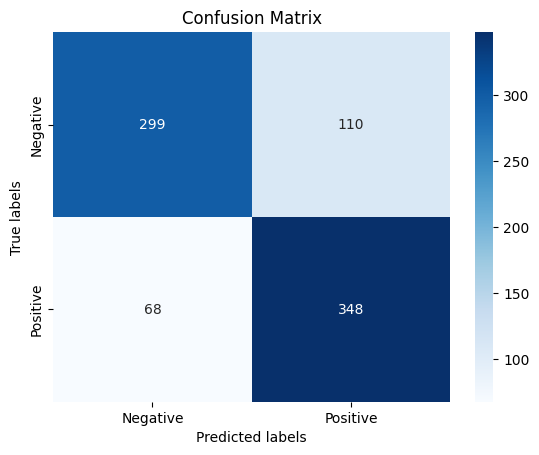

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

**3. USING NEURAL NETWORKS**

In [278]:
import tensorflow as tf
import pandas as pd

**3A. Using a Normal Dense Neural Network**

**Text Vectorization**

In [279]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
df['sentence'], labels, test_size=0.3, random_state=1000)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1923,)
(825,)
(1923,)
(825,)


In [280]:
epochs = 20
embedding_dim = 50
maxlen = 100

from keras.layers import TextVectorization

vectorizer = TextVectorization(standardize='lower_and_strip_punctuation',output_sequence_length=maxlen)
vectorizer.adapt(X_train)

vocabulary = vectorizer.get_vocabulary()
len(vocabulary)
vocab_size = len(vocabulary)+1

print(vocab_size)

# # Transform the text data to a sequence of word indices
X_train = vectorizer(X_train).numpy()
X_test = vectorizer(X_test).numpy()

print(X_train.shape)
print(X_test.shape)


4274
(1923, 100)
(825, 100)


**Creating Word Embedding**

In [281]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding,GlobalMaxPooling1D,Conv1D

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(GlobalMaxPooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [282]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_35 (Embedding)    (None, 100, 50)           213700    
                                                                 
 global_max_pooling1d_22 (G  (None, 50)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_70 (Dense)            (None, 6)                 306       
                                                                 
 dense_71 (Dense)            (None, 1)                 7         
                                                                 
Total params: 214013 (835.99 KB)
Trainable params: 214013 (835.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [283]:
history = model.fit(X_train, y_train,
epochs=20,
batch_size=32,
validation_data=(X_test, y_test))

Epoch 1/20


61/61 [==============================] - 1s 8ms/step - loss: 0.6904 - accuracy: 0.5949 - val_loss: 0.6834 - val_accuracy: 0.6291
Epoch 2/20
61/61 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.8232 - val_loss: 0.6451 - val_accuracy: 0.7515
Epoch 3/20
61/61 [==============================] - 0s 6ms/step - loss: 0.5813 - accuracy: 0.8986 - val_loss: 0.5685 - val_accuracy: 0.7855
Epoch 4/20
61/61 [==============================] - 0s 6ms/step - loss: 0.4510 - accuracy: 0.9267 - val_loss: 0.4861 - val_accuracy: 0.8061
Epoch 5/20
61/61 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.9454 - val_loss: 0.4310 - val_accuracy: 0.8145
Epoch 6/20
61/61 [==============================] - 0s 8ms/step - loss: 0.2152 - accuracy: 0.9615 - val_loss: 0.4034 - val_accuracy: 0.8218
Epoch 7/20
61/61 [==============================] - 1s 10ms/step - loss: 0.1458 - accuracy: 0.9730 - val_loss: 0.3911 - val_accuracy: 0.8242
Epoch 8/20
61/61 [============

In [284]:
import pickle
pickle.dump(model, open('DenseNN.sav', 'wb'))

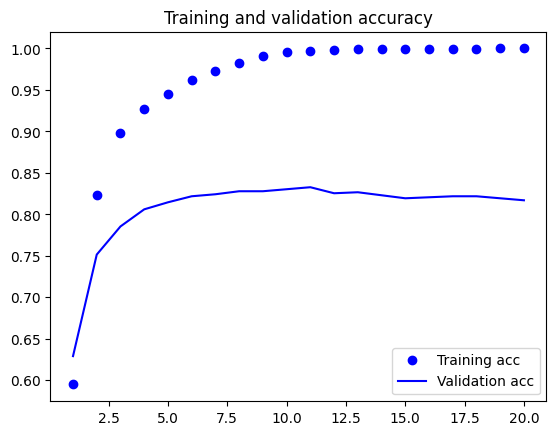

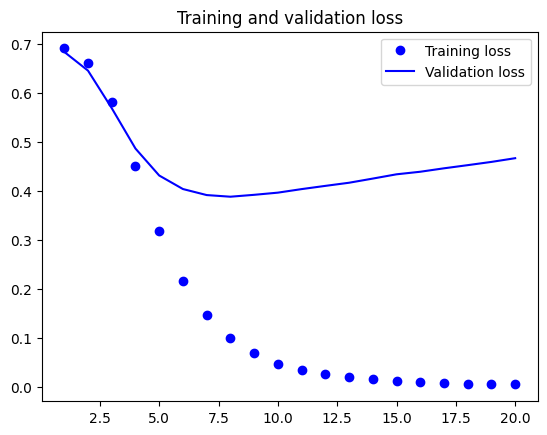

In [285]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [286]:
#predict on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

26/26 [==============================] - 0s 1ms/step
Accuracy score:  0.816969696969697
Precision score:  0.8188235294117647
Recall score:  0.8246445497630331
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       403
           1       0.82      0.82      0.82       422

    accuracy                           0.82       825
   macro avg       0.82      0.82      0.82       825
weighted avg       0.82      0.82      0.82       825



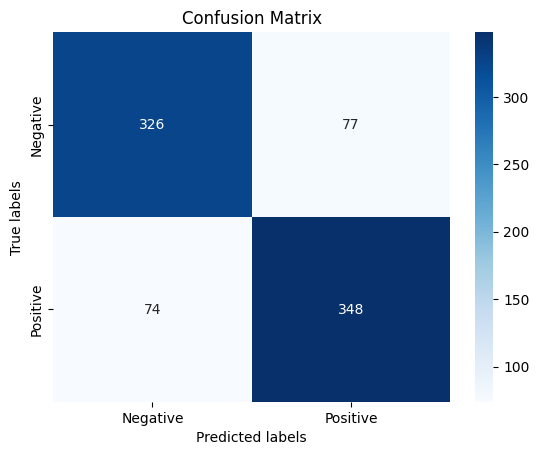

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

**3B. Using a 1D ConvNet**

In [288]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
df['sentence'], labels, test_size=0.3, random_state=1000)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1923,)
(825,)
(1923,)
(825,)


In [289]:
epochs = 20
embedding_dim = 50
maxlen = 100

from keras.layers import TextVectorization

vectorizer = TextVectorization(standardize='lower_and_strip_punctuation',output_sequence_length=maxlen)
vectorizer.adapt(X_train)

vocabulary = vectorizer.get_vocabulary()
len(vocabulary)
vocab_size = len(vocabulary)+1

print(vocab_size)

# # Transform the text data to a sequence of word indices
X_train = vectorizer(X_train).numpy()
X_test = vectorizer(X_test).numpy()

print(X_train.shape)
print(X_test.shape)


4274
(1923, 100)
(825, 100)


In [290]:
print(vocab_size,embedding_dim,maxlen)

4274 50 100


In [291]:
from keras.models import Sequential
from keras import layers

model2 = Sequential()
model2.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model2.add(layers.Conv1D(32,5, activation='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history = model2.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
193/193 [==============================] - 3s 9ms/step - loss: 0.6619 - accuracy: 0.6313 - val_loss: 0.5718 - val_accuracy: 0.7224
Epoch 2/20
193/193 [==============================] - 2s 8ms/step - loss: 0.3786 - accuracy: 0.8736 - val_loss: 0.4256 - val_accuracy: 0.7976
Epoch 3/20
193/193 [==============================] - 2s 8ms/step - loss: 0.1296 - accuracy: 0.9672 - val_loss: 0.4345 - val_accuracy: 0.8158
Epoch 4/20
193/193 [==============================] - 2s 8ms/step - loss: 0.0420 - accuracy: 0.9922 - val_loss: 0.4871 - val_accuracy: 0.8158
Epoch 5/20
193/193 [==============================] - 2s 8ms/step - loss: 0.0182 - accuracy: 0.9984 - val_loss: 0.5211 - val_accuracy: 0.8182
Epoch 6/20
193/193 [==============================] - 2s 8ms/step - loss: 0.0114 - accuracy: 0.9984 - val_loss: 0.5515 - val_accuracy: 0.8133
Epoch 7/20
193/193 [==============================] - 2s 8ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.6072 - val_accuracy: 0.8158
Epoch 

In [292]:
pickle.dump(model2, open('1Dconv.sav', 'wb'))   

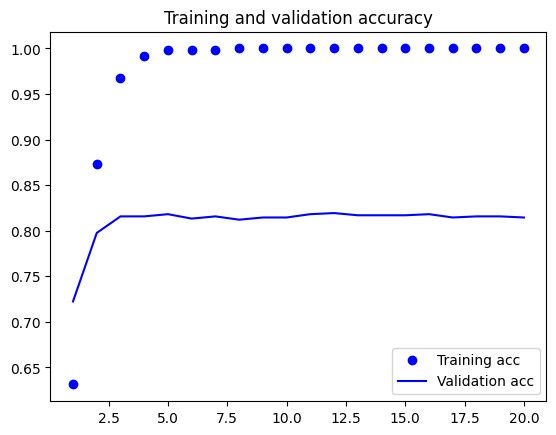

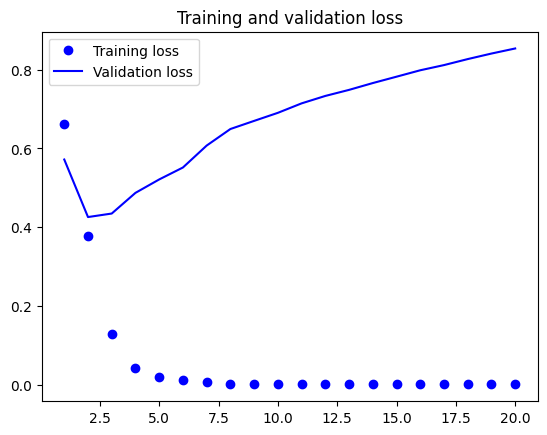

In [293]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [294]:
#predict on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report, confusion_matrix

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

26/26 [==============================] - 0s 2ms/step
Accuracy score:  0.8145454545454546
Precision score:  0.806378132118451
Recall score:  0.8388625592417062
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       403
           1       0.81      0.84      0.82       422

    accuracy                           0.81       825
   macro avg       0.82      0.81      0.81       825
weighted avg       0.81      0.81      0.81       825



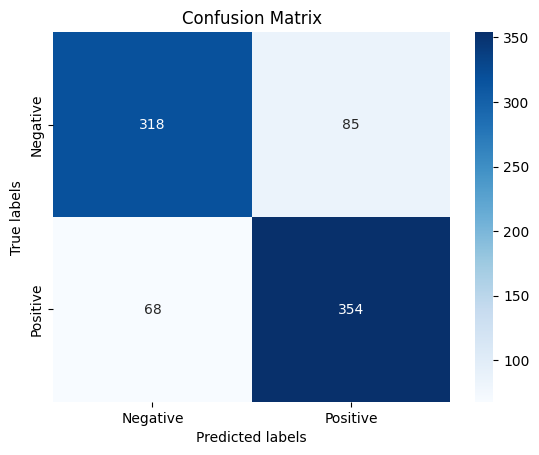

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

**Using Randomized Search to Optimize Hyperparameters**

In [307]:
# Define the CNN model as a function
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [310]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier


# Create KerasClassifier
model = KerasClassifier(model=create_model, epochs=20, batch_size=10, verbose=0)

# Parameter grid for grid search
param_grid = dict(model__num_filters=[32, 64, 128],
                     model__kernel_size=[3, 5, 7],
                      model__vocab_size=[vocab_size],
                      model__embedding_dim=[embedding_dim],
                      model__maxlen=[maxlen])

# RandomizedSearchCV
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, verbose=1, n_iter=5, scoring='accuracy',error_score='raise')
grid_result = grid.fit(X_train, y_train)

# Print best parameters and results
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)


Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best Parameters:  {'model__vocab_size': 4274, 'model__num_filters': 32, 'model__maxlen': 100, 'model__kernel_size': 3, 'model__embedding_dim': 50}
Best Accuracy:  0.8013524341649342


In [311]:
pickle.dump(grid_result, open('grid_resultCNN.sav', 'wb'))

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpuhw7tzpx\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpuhw7tzpx\assets
